In [1]:
import tensorflow as tf


In [2]:
# importing the datasets
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits 0-9

In [5]:
#unpacking dataset in training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 70s 6us/step


In [8]:
import matplotlib.pyplot as plt

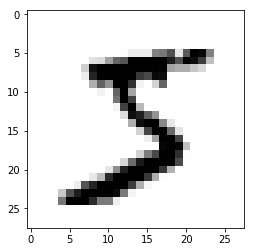

In [12]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* As we see that the data is from 0 - 253, we have to normalized the data so that it will easy for our model to learn.

In [15]:
# Normalized the data
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

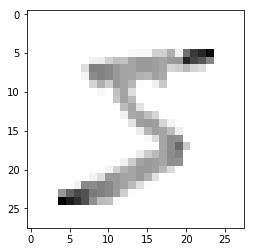

In [18]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Building the Model

In [26]:
model=tf.keras.models.Sequential() # we use Sequential model
# 1st layer is Input Layer 
# as our data is 28x28 we have to flatern that data
# we can flattern by using reshape, numpy or there is builtin layer in keras.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# 1 Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Dense(how many units in layer=(128) neuron in network,activation=relu (it is default function ))
# 2 Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # It is classification problem so we use 10 layers (0-9), it is probability distribution=softmax

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# adam is general optimizer.
# note : A neural network is not tries to maximized accuracy it tries to minimized the loss
model.fit(x_train, y_train, epochs=3)
# If you just train on 1 epoch, then the neural network saw each unique sample once. 3 epochs means it passed over your data set 3 times.

Epoch 1/3
60000/60000 [==============================] - 26s 432us/step - loss: 0.2636 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 25s 423us/step - loss: 0.1090 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 25s 415us/step - loss: 0.0739 - acc: 0.9766


* We see that our loss is getting decrease and our accuracy is increased

In [27]:
val_loss, val_accuracy=model.evaluate(x_test,y_test)
print(val_loss, val_accuracy)

10000/10000 [==============================] - 2s 203us/step
0.09300040596667677 0.9732


* As we see that our model ended up with acc=0.0.9766 and loss=0.0.0739 . But during testing we get little high loss and less acc.
* You should expect that but it should not be too closer or exactly same.
* If there is huge difference then ther is chances that our model is overfit.And if the difference is very small then model is underfit.

# Saving Model

In [28]:
model.save('mnist_reader.model')

In [29]:
new_model=tf.keras.models.load_model('mnist_reader.model')

In [30]:
prediction=new_model.predict([x_test]) # prediction always take a list

In [31]:
prediction

array([[6.30283115e-09, 7.60531993e-09, 6.54075529e-06, ...,
        9.99984860e-01, 1.23446930e-09, 4.87527927e-07],
       [6.11807216e-10, 2.40828685e-05, 9.99953747e-01, ...,
        4.26575358e-10, 1.52160865e-07, 1.38492231e-13],
       [9.83057816e-07, 9.98985589e-01, 8.99568549e-05, ...,
        3.39674472e-04, 2.86498282e-04, 1.78377777e-05],
       ...,
       [1.15747847e-08, 4.80498663e-08, 6.51198135e-08, ...,
        2.48680499e-05, 3.64620814e-06, 1.65493271e-04],
       [9.86355985e-07, 9.39156575e-09, 5.37366207e-10, ...,
        1.45678015e-07, 1.68748447e-04, 1.00885885e-07],
       [2.44540411e-06, 6.90342894e-09, 2.81910206e-06, ...,
        1.05873155e-09, 4.11447481e-08, 1.69085563e-08]], dtype=float32)

In [32]:
import numpy as np

In [36]:
prediction[0]

array([6.3028311e-09, 7.6053199e-09, 6.5407553e-06, 8.0689861e-06,
       1.5592264e-10, 1.8596918e-08, 1.6044781e-13, 9.9998486e-01,
       1.2344693e-09, 4.8752793e-07], dtype=float32)

In [33]:
print(np.argmax(prediction[0])) # Returns the indices of the maximum values along an axis.

7


Index of maximum probability of prediction[0] is 7

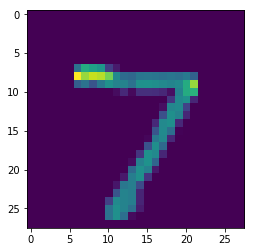

In [35]:
plt.imshow(x_test[0])
plt.show()